# Task F

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Implement a **compute_convolution()** function in python which implements the following discrete convolution operation. <br>
Here, x[n] and h[n] are vectors of lengths $N$ and $M$, respectively, with $M \leq N$. <br><br>

$y[n] = x[n] * h[n] = \sum_{l=0}^{M-1} x[l] h[n-l], \ \ n \in [0, N-1]$ <br>


In [2]:
# def compute_convolution(x, h):
#  """
#  Input:
#  x: numpy array (N,)
#  y: numpy array (N,)
#  Output:
#  z: numpy array (N,)
#  """
#  # compute z = x * h
#  return z

In [3]:
def compute_convolution(x, h):

  N = len(x)
  M = len(h)
  y = np.zeros(N)

  for n in range(N):
    for l in range(M):
      if n - l >= 0 and n - l < N:
        y[n] += x[n - l] * h[l]

  return y

Rectangular function Π(t - 2.5), t ∈ [0,5].

In [4]:
def rect(t):
  return np.where((t >= -2.5) & (t <= 2.5), 1, 0)

**Consider x[n] to represent the sampled version of the rect() function Π(t − 2.5), t ∈ [0,5], with sampling rate sr = 100 Hz**

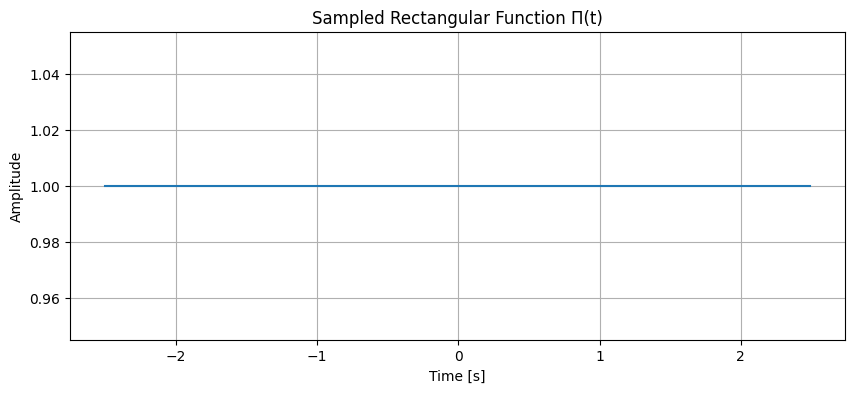

In [5]:
sr = 100
T = 5
N = int(T * sr)

t = np.linspace(-2.5, 2.5, N, endpoint=False)

x = rect(t)

# Plot the sampled rect function
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title('Sampled Rectangular Function Π(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Compute z = x * x * x

In [6]:
y1 = compute_convolution(x, x)
z = compute_convolution(y1, x)

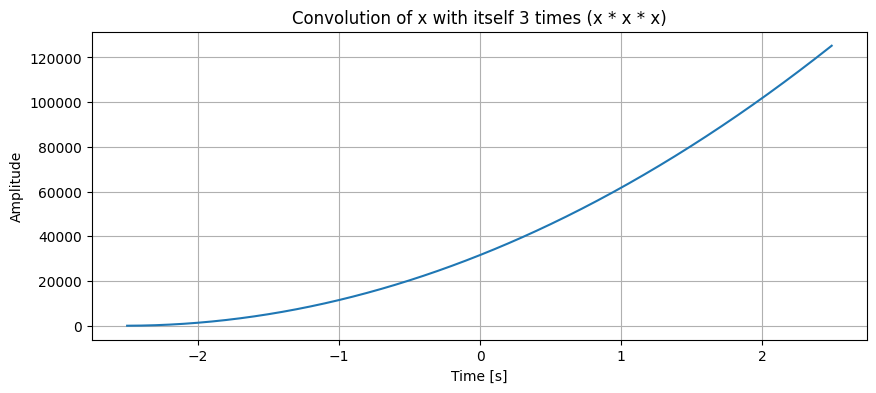

In [7]:
plt.figure(figsize=(10, 4))

plt.plot(t, z)
plt.title('Convolution of x with itself 3 times (x * x * x)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Compute z = x * x * x with normalization after each convolution

In [8]:
y1 = compute_convolution(x, x)
y1_normalized = y1 / np.max(y1) if np.max(y1) != 0 else y1

z = compute_convolution(y1_normalized, x)
z_normalized = z / np.max(z) if np.max(z) != 0 else z



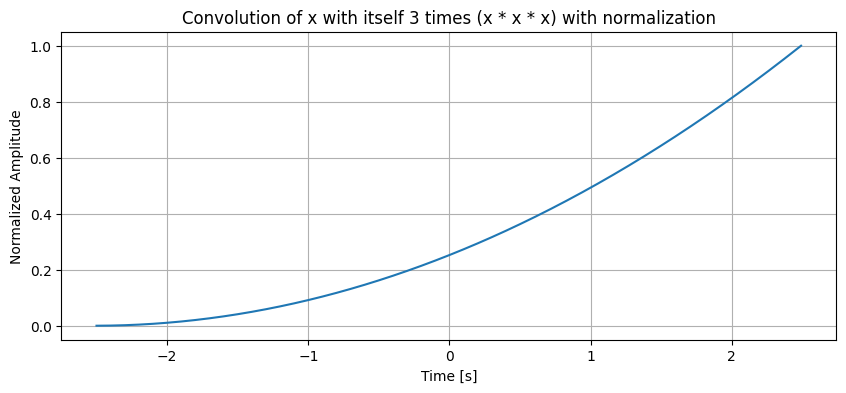

In [9]:
plt.figure(figsize=(10, 4))

plt.plot(t, z_normalized)
plt.title('Convolution of x with itself 3 times (x * x * x) with normalization')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Amplitude')
plt.grid(True)
plt.show()

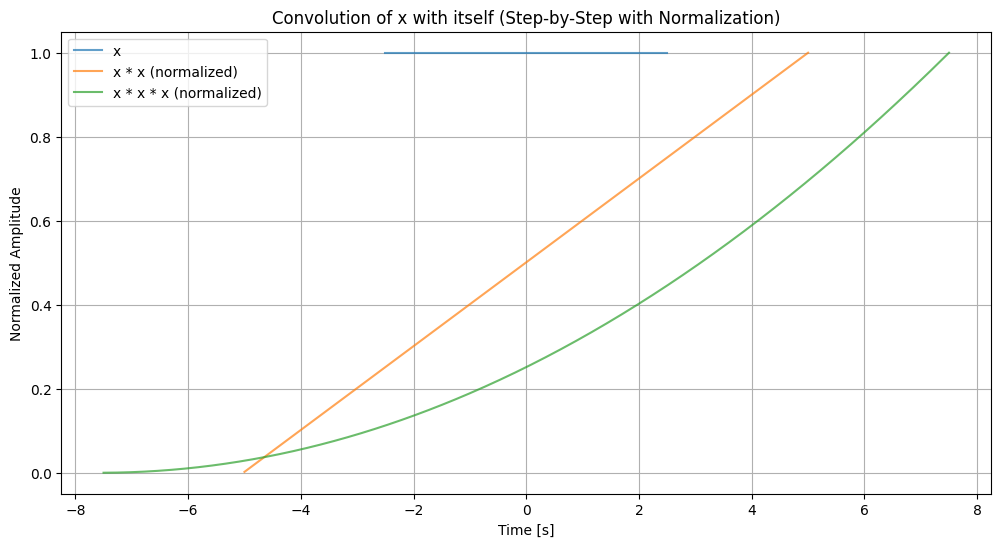

In [10]:
# Original signal x
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='x', alpha=0.7)

# First convolution: y1 = x * x
y1 = compute_convolution(x, x)
y1_normalized = y1 / np.max(y1) if np.max(y1) != 0 else y1
time_y1 = np.linspace(-5, 5, len(y1_normalized))
plt.plot(time_y1, y1_normalized, label='x * x (normalized)', alpha=0.7)


# Second convolution: z = y1_normalized * x
z = compute_convolution(y1_normalized, x)
z_normalized = z / np.max(z) if np.max(z) != 0 else z
time_z = np.linspace(-7.5, 7.5, len(z_normalized))
plt.plot(time_z, z_normalized, label='x * x * x (normalized)', alpha=0.7)


plt.title('Convolution of x with itself (Step-by-Step with Normalization)')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Observations on smoothness:

After the first convolution ($x * x$), the resulting signal is a triangle function, which is smoother than the original rectangular function (x). The corners of the rectangular function have been rounded out.

After the second convolution (($x * x$) * x), the signal becomes even smoother. The sharp peak of the triangle function is now rounded, resulting in a parabolic shape.

In general, convolution with a rectangular pulse tends to smooth out the signal. Repeated convolutions with the same pulse lead to progressively smoother results. This is related to the Central Limit Theorem, where repeated convolutions (like adding independent random variables) tend towards a Gaussian distribution, which is very smooth.

Intuition behind convolution with a rectangular function:

Convolution with a rectangular function is essentially a moving average operation. When you convolve a signal with a rectangular pulse, you are effectively replacing each point in the signal with the average of the signal over the width of the rectangular pulse.

Imagine sliding the rectangular pulse along the signal. At each position, you multiply the signal values within the pulse's window by the pulse's value (which is 1 within the rectangle and 0 outside). Then, you sum up these products. This summation represents the average of the signal within that window.

Because the rectangular function is constant within its width, the convolution output at any point is proportional to the sum (or average) of the input signal over the duration of the rectangular pulse shifted to that point. This averaging process smooths out sharp transitions and reduces high-frequency components in the original signal. The wider the rectangular pulse, the more the signal is averaged and smoothed.